# JSNMF Real Data Demo

In [1]:
from JSNMF.model import JSNMF
import scvi
import scanpy as sc
import numpy as np
import anndata
import scipy.io
import torch

## h3k4me3 data

In [ ]:
# load preprocessed data
mat = scipy.io.loadmat('h3k4.mat')
X1 = mat['X1']
X2 = mat['X2']
label = mat['label'][:,0]


# create AnnData object
rna = anndata.AnnData(X1.T,dtype = np.float64)
atac = anndata.AnnData(X2.T,dtype = np.float64)
rna.obs['celltype'] = label


In [3]:
test_model = JSNMF(rna,atac)
result = test_model.run()

nnsvd W1 done
nnsvd W2 done
D1 done
S1 done
D2 done
S2 done
SNF starts
SNF done
Init done
number of epoch: 1
obj: tensor(2678622.1012)
number of epoch: 2
obj: tensor(2250412.7071)
number of epoch: 3
obj: tensor(2234564.9805)
number of epoch: 4
obj: tensor(2223657.5212)
number of epoch: 5
obj: tensor(2215711.0424)
number of epoch: 6
obj: tensor(2209701.3052)
number of epoch: 7
obj: tensor(2205022.2799)
number of epoch: 8
obj: tensor(2201281.1113)
number of epoch: 9
obj: tensor(2198228.3315)
number of epoch: 10
obj: tensor(2195695.5600)
number of epoch: 11
obj: tensor(2193558.9277)
number of epoch: 12
obj: tensor(2191730.0759)
number of epoch: 13
obj: tensor(2190147.6492)
number of epoch: 14
obj: tensor(2188767.6356)
number of epoch: 15
obj: tensor(2187555.1833)
number of epoch: 16
obj: tensor(2186481.9929)
number of epoch: 17
obj: tensor(2185525.5858)
number of epoch: 18
obj: tensor(2184668.2415)
number of epoch: 19
obj: tensor(2183895.2488)
number of epoch: 20
obj: tensor(2183194.4440)

## Cluster and Visualization

In [4]:
# use S  to do clustering with louvain
S = result['S']
clu = test_model.cluster(S)

### Umap with clustering label

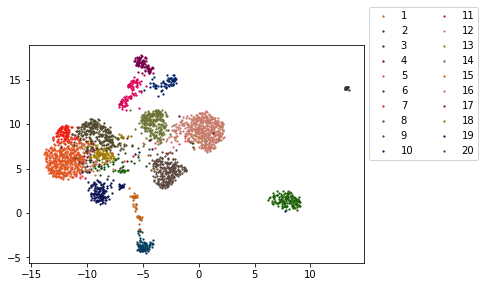

In [11]:
test_model.visualize(S,clu,min_dist = 0.68, n_neighbors=12)

### Umap with true label

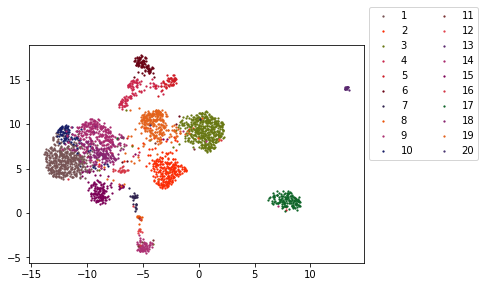

In [9]:
test_model.visualize(S,label,min_dist = 0.68, n_neighbors=12)